<a href="https://colab.research.google.com/github/premkumarkora/regression_ML_Cars/blob/main/regression_ML_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
1. Using cross_val_score to choose the best ML algo
2. Feature Selection using backward elimination
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
location = "/content/drive/My Drive/Colab Notebooks/data/auto-mpg.data"
df = pd.read_csv(location, sep='\s+', header=None, 
 names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'carname'])
display(df.head(3))

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite



Data pre-processing and visualization
Next, we check for any null, missing, incomplete, or inappropriate values using the following code:

The first command will tell you whether there’s any missing value for any numerical data, not string data since string datatype data can be blank and this command doesn't capture that.

The second command will tell you whether the datatype of every feature is as per our expectation i.e. we expect displacement, horsepower, mpg etc. to be numerical datatype (float/int). df.info()will help check whether the data type is exactly what we are expecting. Out put will be like:




In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


We see that horsepower column is perceived as object data type by Pandas, whereas we should be expecting a floating value. It means there is a string somewhere. Now our goal is to find that string values(s) and deduce what to do with the corrupt data.

Generally the steps are to check for null, missing, incomplete, inappropriate values and subsequently clean the data by converting data type to appropriate data types, filling missing values, normalizing etc.

We follow the steps below to clean the corrupt data for horsepower column

Display unique values in horsepower column.

In [8]:
str(set(df['horsepower']))

"{'61.00', '142.0', '230.0', '82.00', '72.00', '81.00', '69.00', '105.0', '49.00', '68.00', '66.00', '167.0', '113.0', '78.00', '60.00', '225.0', '116.0', '170.0', '87.00', '84.00', '94.00', '52.00', '48.00', '46.00', '122.0', '110.0', '129.0', '67.00', '97.00', '152.0', '?', '93.00', '130.0', '91.00', '133.0', '208.0', '53.00', '140.0', '77.00', '107.0', '76.00', '108.0', '75.00', '95.00', '198.0', '158.0', '120.0', '96.00', '115.0', '215.0', '103.0', '145.0', '83.00', '193.0', '100.0', '138.0', '153.0', '125.0', '155.0', '135.0', '74.00', '210.0', '80.00', '65.00', '92.00', '175.0', '54.00', '63.00', '70.00', '64.00', '62.00', '160.0', '112.0', '98.00', '90.00', '71.00', '86.00', '79.00', '149.0', '190.0', '89.00', '220.0', '200.0', '102.0', '165.0', '137.0', '58.00', '150.0', '139.0', '180.0', '148.0', '132.0', '85.00', '88.00'}"

2. Find percentage of non-numeric data in horsepower column

In [9]:
def removenotnum(list1):
 notnum = []
 for x in list1:
   try:
     float(x)
   except:
     notnum.append(x)
 return notnum
notnumtable = removenotnum(df['horsepower'])
print('all rubbish values →', set(notnumtable))
print('Percent of identified rubbish data in Table →', len(notnumtable) / len(df['horsepower'])*100)

all rubbish values → {'?'}
Percent of identified rubbish data in Table → 1.507537688442211


It turns out that only 1.5% of data is corrupt. Identify the row index of those rows containing rubbish value for horsepower column and remove those rows.

In [10]:
indexnames = df[(df['horsepower'] == '?')].index
indexnames

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [11]:
df.drop(axis=0,index=indexnames,inplace=True)

Now convert the remaining clean data in horsepower column to float and see the data types now.

In [12]:
df['horsepower'] = df['horsepower'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


Now, we use some data visualisation techniques to visualise our data on charts, histograms etc to further do any data pre-processing or feature engineering if required. In short, we plot to check any anomaly, outlier, distribution, range of values etc.

pairplot of dependent variable (y) with respect to every independent variable or feature (x1, x2, x3 etc) except car name

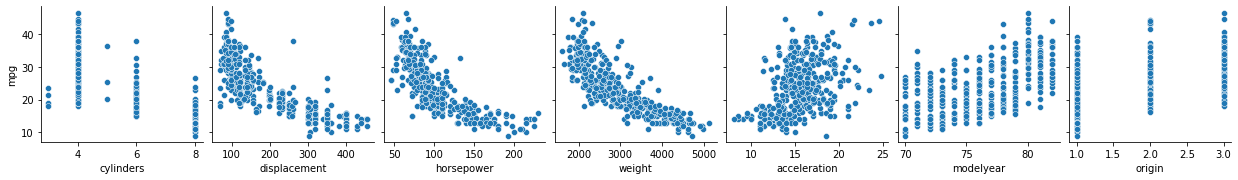

In [13]:
sns.pairplot(df, x_vars=df.drop(['carname','mpg'], 
             axis=1, inplace=False).columns, y_vars= ['mpg'])

In [14]:
df.origin.unique()

array([1, 3, 2])

In [15]:
df.modelyear.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

histogram of dependent variable (y) and every independent variable or feature (x1, x2, x3 etc) except car name. Define and describe a histplot() function and later call it to plot all histograms

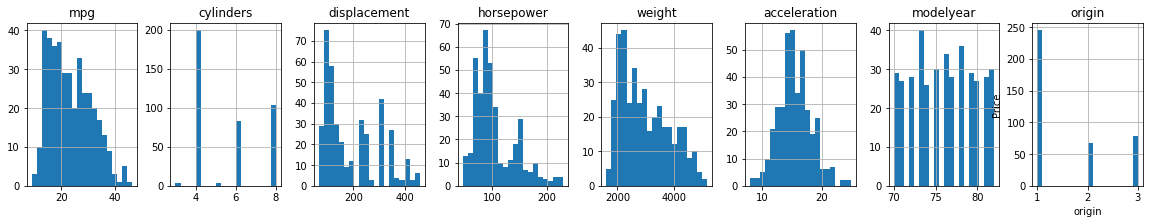

In [16]:
def histplot(df, listvar):
   fig, axes = plt.subplots(nrows=1, ncols=len(listvar), 
                figsize=(20, 3))
   counter=0
   for ax in axes:
    df.hist(column=listvar[counter], bins=20, ax=axes[counter])
    plt.ylabel('Price')
    plt.xlabel(listvar[counter])
    counter = counter+1
plt.show()
 
histplot(df, df.drop(['carname'], axis=1, inplace=False).columns)

To see if any outliers, plot a boxplot of every independent variable or feature (x1, x2, x3 etc) except car name. Define and describe a dfboxplot() function
Define list of continuous variables and call dfboxplot() for only those to detect outliers

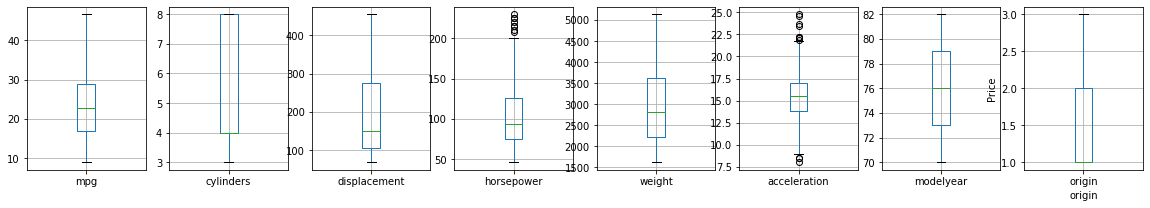

In [17]:
def dfboxplot(df, listvars):
   fig,axes=plt.subplots(nrows=1,ncols=len(listvars),figsize=(20,3))
   counter=0
   for ax in axes:
    df.boxplot(column=listvars[counter], ax=axes[counter])
    plt.ylabel('Price')
    plt.xlabel(listvars[counter])
    counter = counter+1
plt.show()
# Create a list of continuous variables
linear_vars = df.select_dtypes(include=[np.number]).columns
# call dfboxplot() for only linear_vars to detect outliers
dfboxplot(df, linear_vars)

Lastly, remove outliers using z-score. Generally a z-score of 3 is considered practically useful to detect and remove outliers.

In [18]:
# this removes dataframe’s outliers inplace
def removeoutliers(df, listvars, z):
 from scipy import stats
 for var in listvars:
  df1 = df[np.abs(stats.zscore(df[var])) < z]
  return df1
# remove outliers where z score > 3
df = removeoutliers(df, linear_vars,3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


# Set up Machine learning model
1. Set up X and y dataframes

— for dependent variable (y) and independent features (x1, x2, x3 etc)

Two square brackets [[… ]] are needed to create a dataframe.


Single [] will create a series / array

In [19]:
X_df  = df.drop(['acceleration','mpg','carname'], axis=1, inplace=False)
y_df  = df[['mpg']]
X_df

,cylinders,displacement,horsepower,weight,modelyear,origin
0,8,307.0,130.0,3504.0,70,1
1,8,350.0,165.0,3693.0,70,1
2,8,318.0,150.0,3436.0,70,1
3,8,304.0,150.0,3433.0,70,1
4,8,302.0,140.0,3449.0,70,1
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,82,1
394,4,97.0,52.0,2130.0,82,2
395,4,135.0,84.0,2295.0,82,1
396,4,120.0,79.0,2625.0,82,1


In [20]:
df_le = X_df.copy()
# add a new column in dataframe — join 2 dataframe columns-wise
df_le['mpg'] = y_df['mpg'].values
df_le.corr()

,cylinders,displacement,horsepower,weight,modelyear,origin,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.345647,-0.568932,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.369855,-0.614535,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.416361,-0.455171,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.309120,-0.585005,-0.832244
modelyear,-0.345647,-0.369855,-0.416361,-0.309120,1.000000,0.181528,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.181528,1.000000,0.565209
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.580541,0.565209,1.000000


# 2. Convert features to log
— Since we say in histogram plots that features are not normally distributed, we will convert them to log.

Most Machine Learning equations rely on the assumption that the underlying data is normally distributed.

In [21]:

def convertfeatures2log(df, listvars):
   for var in listvars:
    df[var] = np.log(df[var])
    convertfeatures2log(X, X.columns)
    convertfeatures2log(y, y.columns)
histplot(X, X.columns)
y.hist(bins=20)

#we are using Standard Scalar


NameError: ignored

# 3. Test Train Split
Data scientists generally split the data for machine learning into either two or three subsets: 2 subsets for training and testing, while 3 for training, validation and testing.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [23]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'modelyear',
       'origin'],
      dtype='object')

In [ ]:
#std = StandardScaler()
#X_train = std.fit_transform(X_train)
#X_test = std.transform(X_test)
#X_train

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

<ipython-input-24-bf516354fe55>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


# Now, we plot a scatter plots for predictions vs. actuals:

ML algo log results vs. log of mpg in dataset
exponent of predicted values vs. real mpg in dataset

Text(0, 0.5, 'predicted MPG')

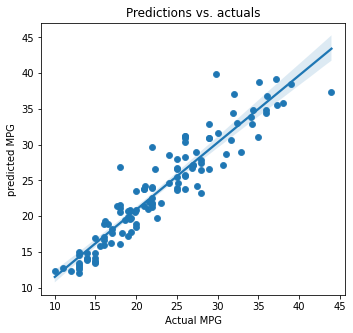

In [25]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, 0])
#ax2 = fig.add_subplot(grid[0, 1])
sns.scatterplot(x = y_test['mpg'], y = y_pred, ax=ax1)
sns.regplot(x = y_test['mpg'], y=y_pred, ax=ax1)
ax1.set_title("Predictions vs. actuals")
ax1.set_xlabel('Actual MPG')
ax1.set_ylabel('predicted MPG')
#sns.scatterplot(x = np.exp(y_test['mpg']), y = np.exp(y_pred), ax=ax2,)
#sns.regplot(x = np.exp(y_test['mpg']), y=np.exp(y_pred), ax=ax2)
#ax2.set_title("Real values of Predictions vs. actuals")
#ax2.set_xlabel('Actual MPG')
#ax2.set_ylabel('predicted MPG')

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1.8887231638418105
MSE: 6.8694250903955245
RMSE: 2.6209588112741344


After inspecting the scatter plot, we realize its quite well predicted. So now, I will try to improve the ML algo for more accurate predictions.

In the next section, I will talk more about the 2 other key aspects of approaching and solving a regression machine learning problem that I mentioned earlier:

Using cross_val_score to choose the best ML algo
Feature Selection using backward elimination

In [27]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models=[]

models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor(n_estimators=100)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR',SVR(gamma='auto')))

# now evaluate each model 
results = []
names = []
print("model: mean of score across 10 folds (std dev of score)")

for name, model in models:
    # --> split training dataset into 10 parts; train on 9 and test on 1; repeat for all combinations.
    kfold = KFold (n_splits=10);
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold);
    results.append(cv_results);
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

model: mean of score across 10 folds (std dev of score)
LR: 0.802350 (0.044780)
RF: 0.851248 (0.081766)
KNN: 0.690981 (0.130974)
CART: 0.753423 (0.149284)
SVR: -0.049536 (0.080025)


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 110 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     274 non-null    int64  
 1   displacement  274 non-null    float64
 2   horsepower    274 non-null    float64
 3   weight        274 non-null    float64
 4   modelyear     274 non-null    int64  
 5   origin        274 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 15.0 KB


In [29]:
import statsmodels.api as sm

X_train_opt = np.append(arr = np.ones((274,1)).astype(int), values = X_train, axis = 1)
X_train_opt = X_train_opt[:,[0, 1, 2, 3, 4, 5, 6]]

regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           5.17e-97
Time:                        13:38:20   Log-Likelihood:                -722.13
No. Observations:                 274   AIC:                             1458.
Df Residuals:                     267   BIC:                             1484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.5027      5.402     -2.870      0.004     -26.138      -4.868
x1            -0.3633      0.413     -0.880      0.379      -1.176       0.449
x2             0.0154      0.009      1.640      0.102      -0.003       0.034
x3            -0.0317      0.013     -2.455      0.015      -0.057      -0.006
x4            -0.0059      0.001     -8.487      0.000      -0.007      -0.005
x5             0.7401      0.065     11.391      0.000       0.612       0.868
x6             1.6786      0.340      4.932      0.000       1.008       2.349
==============================================================================
Omnibus:                       26.843   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.959
Skew:                           0.651   Prob(JB):                     5.72e-09
Kurtosis:                       4.277   Cond. No.                     8.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import statsmodels.api as sm

X_train_opt = np.append(arr = np.ones((274,1)).astype(int), values = X_train, axis = 1)
X_train_opt = X_train_opt[:,[0, 3, 4, 5, 6]]

regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     306.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           6.86e-99
Time:                        13:38:27   Log-Likelihood:                -723.58
No. Observations:                 274   AIC:                             1457.
Df Residuals:                     269   BIC:                             1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2592      5.315     -3.059      0.002     -26.723      -5.795
x1            -0.0219      0.011     -1.951      0.052      -0.044       0.000
x2            -0.0053      0.001     -9.961      0.000      -0.006      -0.004
x3             0.7308      0.065     11.317      0.000       0.604       0.858
x4             1.4698      0.317      4.644      0.000       0.847       2.093
==============================================================================
Omnibus:                       28.827   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.637
Skew:                           0.661   Prob(JB):                     3.34e-10
Kurtosis:                       4.441   Cond. No.                     7.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import statsmodels.api as sm

X_train_opt = np.append(arr = np.ones((274,1)).astype(int), values = X_train, axis = 1)
X_train_opt = X_train_opt[:,[0, 3, 4, 5, 6]]

regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     306.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           6.86e-99
Time:                        13:38:31   Log-Likelihood:                -723.58
No. Observations:                 274   AIC:                             1457.
Df Residuals:                     269   BIC:                             1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2592      5.315     -3.059      0.002     -26.723      -5.795
x1            -0.0219      0.011     -1.951      0.052      -0.044       0.000
x2            -0.0053      0.001     -9.961      0.000      -0.006      -0.004
x3             0.7308      0.065     11.317      0.000       0.604       0.858
x4             1.4698      0.317      4.644      0.000       0.847       2.093
==============================================================================
Omnibus:                       28.827   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.637
Skew:                           0.661   Prob(JB):                     3.34e-10
Kurtosis:                       4.441   Cond. No.                     7.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_train2 = X_train.iloc[:,[2,3, 4, 5]]
X_test2 = X_test.iloc[:,[2,3, 4, 5]]

Text(0, 0.5, 'predicted MPG')

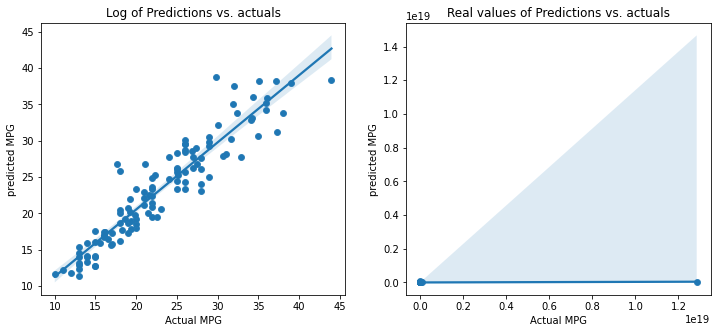

In [33]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train2,y_train)
y_pred = rf.predict(X_test2)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])

sns.scatterplot(x = y_test['mpg'], y = y_pred, ax=ax1)
sns.regplot(x = y_test['mpg'], y=y_pred, ax=ax1)

ax1.set_title("Log of Predictions vs. actuals")
ax1.set_xlabel('Actual MPG')
ax1.set_ylabel('predicted MPG')

sns.scatterplot(x = np.exp(y_test['mpg']), y = np.exp(y_pred), ax=ax2,)
sns.regplot(x = np.exp(y_test['mpg']), y=np.exp(y_pred), ax=ax2)

ax2.set_title("Real values of Predictions vs. actuals")
ax2.set_xlabel('Actual MPG')
ax2.set_ylabel('predicted MPG')

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.9196468926553674
MSE: 6.705822434086631
RMSE: 2.5895602781334577


In [35]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import lazypredict 
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:02<00:00, 14.90it/s]

[13:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.86,0.87,2.63,0.04
RandomForestRegressor,0.86,0.87,2.64,0.17
HistGradientBoostingRegressor,0.86,0.87,2.65,0.16
KNeighborsRegressor,0.86,0.87,2.67,0.01
ExtraTreesRegressor,0.86,0.86,2.69,0.11
BaggingRegressor,0.85,0.86,2.70,0.03
SVR,0.85,0.86,2.72,0.03
NuSVR,0.85,0.86,2.75,0.02
PoissonRegressor,0.84,0.85,2.80,0.02
